# Intro to Machine Learning on Coursera

Based on the [Machine Learning Specialization course by Andrew Ng](https://www.coursera.org/specializations/machine-learning-introduction)

In [1]:
# Imports
import random
from sympy import symbols, diff, lambdify
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Supervised Machine Learning: Regression and Classification

### Polynomial Regression

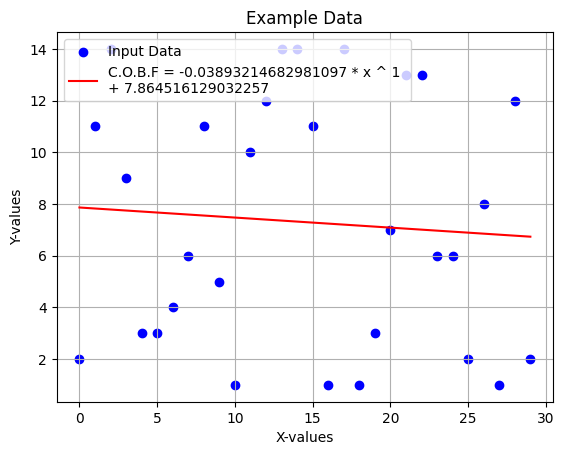

In [2]:
# Polynomial regression
polyDeg = 1

# Training data
xArr:npt.NDArray[np.int64] = np.array([x for x in range(0, 30)])
# yArr is 30 elements long, ranging from 0 to 15
yArr:npt.NDArray[np.int64] = np.random.randint(0, 15, 30) 
# Curve of best fit and weights
predWeights:npt.NDArray[np.float64] = np.polyfit(xArr, yArr, polyDeg) 
bestFitCurve:npt.NDArray[np.float64] = np.polyval(predWeights, xArr)

# Format polynomial function strings
def extrapolatePolynomials():
    functionString:str = ""
    displayString:str = ""
    # Generate strings
    for index in range(len(predWeights)):
        currDeg:int = len(predWeights) - index - 1
        functionString += f"{predWeights[index]}" 
        displayString += f"{predWeights[index]}"
        if currDeg > 0:
            functionString += f" * x ** + {currDeg} + "
            displayString += f" * x ^ {currDeg} \n+ "
    
    #Generate executable polynomial function from functionString
    executablePolynomial:function = lambdify(["x"], functionString)
    return (executablePolynomial, displayString)

#Store function and configured string for later
bestFitPoly, cobfStr = extrapolatePolynomials()

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")
plt.plot(xArr, bestFitCurve, color="red", label=f"C.O.B.F = {cobfStr}")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Gradient Descent

In [3]:
# Gradient descent on a known cost function
# Cost function, f(x)
def cost_func(x:float):
    return bestFitPoly(x) # calculated earlier from COBF
# Gradient of the cost function, f'(x)
def gradient(x:float):
    a = symbols('x')
    f_prime = diff(cost_func(a), a)
    derivative:function = lambdify(["x"], f_prime)
    return derivative(x)

# Gradient Descent parameters
learnRate:float = 2**(-8) # Step size 1/(2^8)
iterations:int = 10_000 # Number of iterations
xGuess:float = 0.0 # Initial guess for x (starting point)

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = gradient(xGuess)
    
    # Update x using the Gradient Descent formula
    xGuess = xGuess - learnRate * grad

# The value of x after optimization represents the minimum of the cost function
minimum_x:float = xGuess
minimum_cost:float = cost_func(minimum_x)

# Print the result
print(f"Minimum value of x: {minimum_x}")
print(f"Minimum cost: {minimum_cost}")

Minimum value of x: 1.52078698553976
Minimum cost: 7.805308626814357


### Logistic Regression

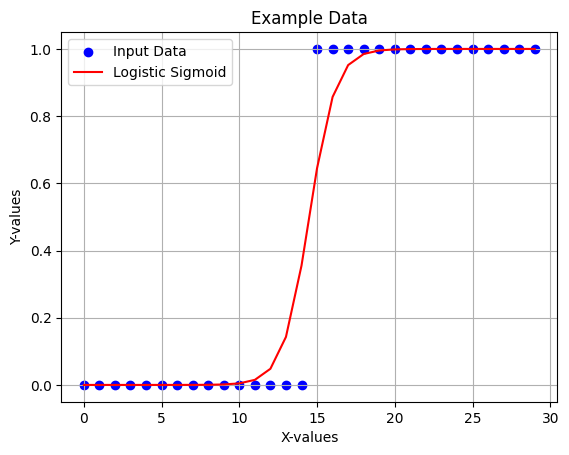

In [4]:
# Classification via Logistic Regression
xArr = np.array([x for x in range(0, 30)])
yArr = np.array([0 for y in range(0, 15)]
                + [1 for y in range(15, 30)]) # either 0 or 1

# Create an instance of a logistic regressor
logReg = LogisticRegression()
logReg.fit(xArr.reshape(-1, 1), yArr)
# Should match yArr, since "testing" with the training input
# print(logReg.predict(xArr.reshape(-1, 1))) 

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")

plt.plot(xArr, logReg.predict_proba(xArr.reshape(-1, 1))[:,1],
        color="red", label="Logistic Sigmoid")# only plot the probability of being 1
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Polynomial and Logistic Regression

- Maybe todo, Idk yet

In [5]:
print("TODO later")

TODO later


## Advanced Learning Algorithms

In [6]:
import tensorflow as tf
from tensorflow import nn
import keras
from keras import layers, losses, optimizers

### Simple Tensorflow Inference

In [7]:
# Roasting coffee beans at 200 degrees Celsius, for 17 minutes
inputArr:npt.NDArray[np.float64] = np.array([[200.0, 17.0]])

"""
Structure of the neural network:
         x
in  =>   x   =>  a1   => a2(out)
         x
        (1x3)   (1x1)
"""

# Create the first layer (3 neurons receiving inputArr, w/ a sigmoid activation)
layer1:layers.Dense = layers.Dense(units=3, activation="sigmoid") # 1x3 tensor
a1:layers.Dense = layer1(inputArr) # output of layer1 when given inputArr
print(a1) # lists the tensor, its shape (1x3), and its type (float)
# print(layer1.weights) # lists the weights of the layer

#Create the second layer (1 neuron receiving layer1, w/ a sigmoid activation)
layer2:layers.Dense = layers.Dense(units=1, activation="sigmoid") # 1x1 tensor
a2:layers.Dense = layer2(a1) # output of layer2 when given a1 (output of layer1)
print(a2)
# print(layer2.weights)

# Do processing with the output of the final layer (in this case, a2)
yHat:int
if(a2 >= 0.5):
    yHat = 1
else:
    yHat = 0
print(f"Coffee roasted good?: {yHat}")
# Note the seemingly-random output due to not controling the layers' "training"

tf.Tensor([[0. 1. 1.]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.20028557]], shape=(1, 1), dtype=float32)
Coffee roasted good?: 0


In [8]:
# Alternatively, string the layers together into a sequence
# Then call the complete model at once
# This should be optimized for training compared to running individual layers once
myModel:keras.Sequential = keras.Sequential(
    [ # Identical to the previously-defined layers 1 and 2
        layers.Dense(units=3, activation="sigmoid"),
        layers.Dense(units=1, activation="sigmoid") 
    ]
)# Convention to define the layers in the model but can be defined beforehand 

# Training x and y values
xTrainArr:npt.NDArray[np.float64] = np.array(
    [
        [200.0, 17.0],
        [120.0, 5.0],
        [425.0, 20.0],
        [212.0, 18.0]
    ]
)
yTrainArr:npt.NDArray[np.int64] = np.array([1, 0, 0, 1])

# Compile the model, then fit the data to the model
# myModel.compile() #???
# myModel.fit(xTrainArr, yTrainArr)

### Bonus: Defining the "Dense" Function

In [9]:
# Sigmoid Function
def sigmoid(inputArr:npt.NDArray[np.float64]):
    return 1/(1 + np.exp(-inputArr))

# Rough definition for the vectorized "Dense" function
def myDense(
        A_in:npt.NDArray[np.float64],
        W:npt.NDArray[np.float64],
        B:npt.NDArray[np.float64]
    ):
    # np.matmul does matrix multiplication btwn A_in and W 
    Z:npt.NDArray[np.float64] = np.matmul(A_in, W) + B
    # Return as A_out the sigmoid (activation function) of Z
    return sigmoid(Z)


### Neural Network Training

In [10]:
# Recall the previously defined Neural Net model (myModel)
# To train it, compile with the appropriate loss function, then fit the data

# BinaryCrossentropy is a loss function based on the logistic loss function
# Other loss function exist, such as MeanSquaredError
myModel.compile(loss=losses.BinaryCrossentropy())
myModel.fit(xTrainArr, yTrainArr, epochs=100) # Train for 100 epochs

"""
Recommendations for activation functions (g(z)) (not to be confused with loss functions):
___Output Layer___
Binary classification: Sigmoid
Regression with positive/negative outputs: Linear
Regression with only natual numbers outputs (0 and +): ReLU
___Hidden Layer___
Most-common/generally faster: ReLU
Binary classification: Sigmoid
"""

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0048
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.0016
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.9992
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9973
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9956
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.9940
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9925
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.9912
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9898
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.9886
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.9873
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.9861
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9850
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9838
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9827
Epoch 16/100
1/1 ━━━━

'\nRecommendations for activation functions (g(z)) (not to be confused with loss functions):\n___Output Layer___\nBinary classification: Sigmoid\nRegression with positive/negative outputs: Linear\nRegression with only natual numbers outputs (0 and +): ReLU\n___Hidden Layer___\nMost-common/generally faster: ReLU\nBinary classification: Sigmoid\n'

### Multi-Class Classification via SoftMax

For each possible class, we calculate the corresponding Logistic Regression:

$$ z_{n} = \vec{w_{n}} \cdot \vec{x} + b_{n} $$

From there, we apply the SoftMax activation function for each possible class, where we calculate $ a_n = P(y = n) $ for a given $ \vec{x} $:
$$ a_{n} = \frac{e^{z_{n}}}{\sum_{i=1} ^ {n} e^{z_{i}}} = P(y = n|\vec{x}) $$

Note: $ \sum_{i=1} ^ {n} a_i = 1 $

In [11]:
"""
Note: a recommended loss function for SoftMax is SparseCategoricalCrossentropy
"""
# SoftMax implementation:
mySoftMaxModel:keras.Sequential = keras.Sequential(
    [ # 2 hidden ReLU layers and an outer Linear layer
        layers.Dense(units=25, activation="relu"),
        layers.Dense(units=15, activation="relu"),
        layers.Dense(units=10, activation="linear") # 10 possible classes
    ]
)
# Outer layer should be SoftMax, but TensorFlow optimizations allow the alternative
# Likewise to optimize binary classification, use Linear instead of Sigmoid here

# Optimized loss function is SparseCategoricalCrossentropy(from_logits=True)
# Likewise for binary classification, we have BinaryCrossentropy(from_logits=True)
# Using the activation function directly here allows TensorFlow optimizations
mySoftMaxModel.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=1E-3) # Start with learning rate at 1E-3
    # "Adam" optimizes the "alpha" in Gradient Descent for regression epochs
)

"""
The compiled data now predicts z_1 through z_10 instead of a_1 through a_10
You must run predictions using the SoftMax/Sigmoid function afterwards
(Per the model type)
"""
# X_sfm = ???
# Y_sfm = ???
# mySoftMaxModel.fit(X_sfm, Y_sfm, epochs=100)
# logits = mySoftMaxModel(X_sfm)
# f_x = tf.nn.softmax(logits)

"""
Note: Multi-Label Classification: multiple classes, any combination can be right
Each label is checked for "independently", though there is only one model
(NOT to be confused with Multi-Classification: multiple classes, only one is right)
"""

'\nNote: Multi-Label Classification: multiple classes, any combination can be right\nEach label is checked for "independently", though there is only one model\n(NOT to be confused with Multi-Classification: multiple classes, only one is right)\n'

### Dense vs Convolutional Neural Net Layers

- Dense Layer: $ \vec{a_{1}} ^{[2]} = g(\vec{w_{1}} ^{[2]} \cdot \vec{a} ^{[1]} + \vec{b_{1}} ^{[2]}) $
- Convolutional Layer:
    - Each neuron only looks at a fraction of the previous layer
    - Speeds up computations and needs less training data to avoid overfitting 

### Developing Machine Learning Diagnostics

Goal: If a model isn't training accurately, diagnose what could be the issue before adjusting and retraining. It's worth the investment to develop diagnostics if running them can prevent you from wasting more time adjusting for issues based on whims alone.

Possible issues:
- Need more training data (reduces variance)
- Need more or fewer features (increasing reduces bias, decreasing reduces variance)
- Need to increase polynomial features (reduces bias)
- Need to increase or decrease $ \lambda $ (increasing reduces variance, decreasing reduces bias)

## Unsupervised Learning, Recommenders, Reinforcement Learning

In [37]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [57]:
# Configure random cluster data for later use
# Parameters
myNumOfSamples:int = 300 # Number of (x, y)-coordinates
myBlobCount:int = 2 # Number of clusters

# Generate random blobs
blobPoints, blobLables = make_blobs(
    n_samples = myNumOfSamples, # Number of points goes here
    centers = myBlobCount, # Number of blobs goes here
    n_features = 2, # 2D Arrays for 2D coordinates
    random_state = 0
    # blobPoints is (X, Y) pairs
    # blobLabels is the cluster labels (0 to length - 1)
)

### K-Means and Clustering

T/F: The 2 made blobs match the 2 detected ones:
True


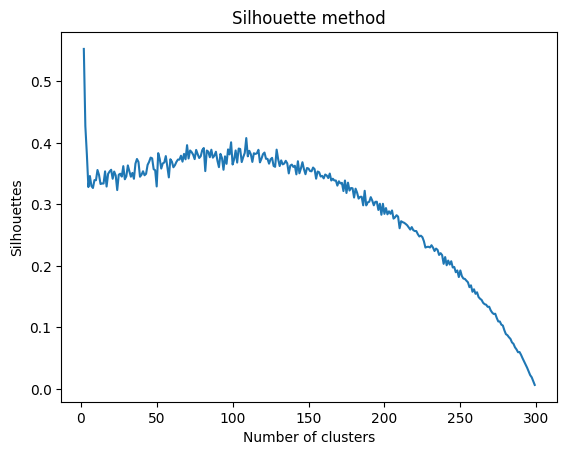

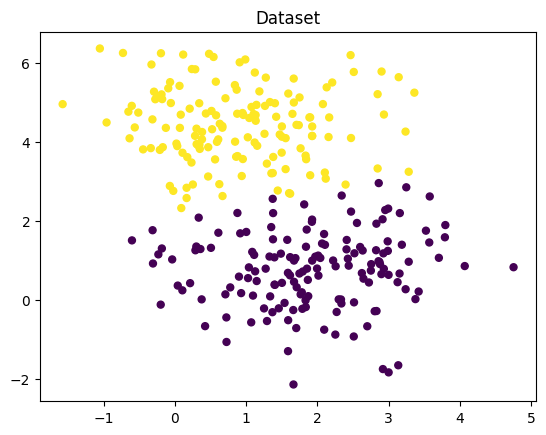

In [58]:
# Use K-Means to produce the optimal number of clusters
# Grab the 0th index of each array in the 2D matrix for the x-values
newX:npt.NDArray[np.floating] = np.array(blobPoints[:, 0])
# Grab the 1st index of each array in the 2D matrix for the y-values
newY:npt.NDArray[np.floating] = np.array(blobPoints[:, 1])

# Find the number of clusters via K-Means
def kMeansPlot(xIn:npt.NDArray, yIn:npt.NDArray):
    # K-Means doesn't work with less than 2 clusters
    # Also, isn't clustering if every point is its own cluster
    # Therefore, ranging fromm 2 through arrayLength - 1
    myRange:range = range(2, len(xIn)) 
    data:list[tuple[int]] = list(zip(xIn, yIn)) #Zip the elements into tuples
    silhouettes:list = []

    # Calculate the silhouettes for each possible k-value
    for k in myRange:
        kmeans:KMeans = KMeans(n_clusters = k).fit(data) # Assume K clusters for the loop
        labels = kmeans.labels_
        silhouettes.append(silhouette_score(data, labels, metric="euclidean"))

    # Calculate the max silhouette for the optimial k-value
    findOptimalK:list[tuple[int]] = list(zip(myRange, silhouettes))
    # Primarily sort in descending order by the 2nd value first
    # Then secondarily sort in ascending order by ascending order of the 1st value
    # Finally retrieve the 1st element of the 1st sorted tuple
    optK:int = sorted(findOptimalK, key = lambda x:(-x[1], x[0]))[0][0]
    print(
        f"T/F: The {myBlobCount} made blobs match the {optK} detected ones:\n"
        + f"{myBlobCount==optK}"
    )

    # Plot the silhouettes to show the optimal k-means (max silhouette height)
    plt.figure()
    plt.plot(myRange, silhouettes)
    plt.title('Silhouette method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouettes')
    plt.show()

    # Now we know the optimal k-value, perform K-means with that number of clusters
    kMeansReal = KMeans(n_clusters = optK)
    kMeansReal.fit(data)

    # Return the labels that indicate which points belong to which clusters
    return kMeansReal.labels_  

# Plot the clusters for the provided data
myClusters:np.ndarray = kMeansPlot(newX, newY)
plt.figure()
plt.scatter(newX, newY, c=myClusters, s=25) # "s" controls "size" of markers
plt.title("Dataset")
plt.show()

### Anomaly Detection

Detected Anomalies:
[[ 3.35941485  5.24826681]
 [-0.31431938  1.76171596]
 [-0.23335252  1.14914807]
 [ 2.39417165  2.91870722]
 [ 0.72305587 -1.07096103]
 [-0.33025677  5.96191801]
 [ 0.33265168  2.08038418]
 [ 3.23557903  4.26153018]
 [-0.03933555  1.02138557]
 [ 0.11504439  6.21385228]
 [ 3.13346483 -1.66152101]
 [ 3.13950603  5.64031528]
 [ 2.99831361 -1.84201351]
 [ 2.85942078  2.95602827]
 [ 2.89921211  5.78430212]
 [ 1.66287852 -2.14847939]
 [-0.18433654  1.29916272]
 [-0.73000011  6.25456272]
 [-1.05441439  6.36828019]
 [ 2.84382904  5.20983199]
 [-0.3089063   0.91799784]
 [ 3.2460247   2.84942165]
 [ 4.0665242   0.85306823]
 [-0.20029671 -0.12484318]
 [ 3.57526238  2.61725297]
 [ 0.1631238   2.57750473]
 [ 0.08848433  2.32299086]
 [ 2.50904929  5.7731461 ]
 [-0.19685333  6.24740851]
 [-0.60390472  1.50398318]
 [ 2.84382807  3.32650945]
 [ 2.46452227  6.1996765 ]
 [ 3.7941402   1.89205805]
 [ 3.28018678  3.2437715 ]
 [-1.57671974  4.95740592]
 [ 4.75149157  0.82373899]
 [ 2.932

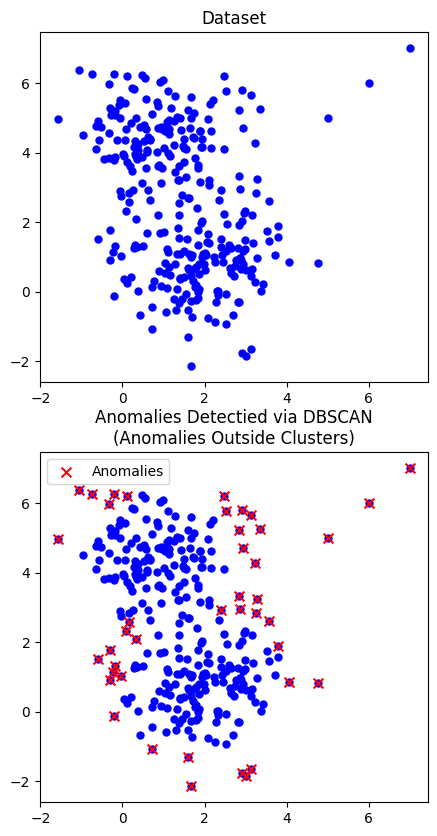

In [59]:
# Detect anomalies when compared to the Gaussian Distribution of the data
# Insert anomalies into the data we will compare against
myAnomalies:npt.NDArray[np.floating] = np.array([[5, 5], [6, 6], [7, 7]])
newPoints:npt.NDArray = np.vstack([blobPoints, myAnomalies])
# Split off into x and y axes again
newX = np.array(newPoints[:, 0])
newY = np.array(newPoints[:, 1])

# Apply DBSCAN to detect anomalies with an increased epsilon
dbscan:DBSCAN = DBSCAN(eps=1, min_samples=41) # Increase eps
labels:npt.NDArray = dbscan.fit_predict(newPoints)
# Anomalies are considered as points with label -1
detectedAnomalies:npt.NDArray = newPoints[labels == -1]
print(f"Detected Anomalies:\n{detectedAnomalies}")

# Plot the clusters again, now detecting the anomalies
plt.figure(figsize=(5, 10))
# Before detection
plt.subplot(2, 1, 1) # 2x1
plt.scatter(newX, newY, c='blue', marker='o', s=25)
plt.title("Dataset")
# After detection (should detect the intended anomalies)
plt.subplot(2, 1, 2)
# Visualize the anomalies
plt.scatter(newX, newY, c='blue', marker='o', s=25)
plt.scatter(detectedAnomalies[:, 0], detectedAnomalies[:, 1],
            c='red', marker='x', s=50, label='Anomalies')
plt.title("Anomalies Detectied via DBSCAN\n(Anomalies Outside Clusters)")
plt.legend()
plt.show()